In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = kagglehub.dataset_download("hetmengar/ola-and-uber-ride-booking-and-cancellation-data")

# print("Path to dataset files:", path)


In [3]:
print("Files in folder:", os.listdir(path))

Files in folder: ['Bookings.csv']


In [4]:
df = pd.read_csv(f"{path}/Bookings.csv")
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?,NaN


# Data Cleaning

In [5]:
df.head(10)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?,NaN
5,2024-07-13 4:42:00,04:42:00,CNR8787177882,Success,CID802429,Mini,Kadugodi,Vijayanagar,231.0,90.0,...,NaN,No,NaN,173,UPI,41,3.4,4.6,#NAME?,NaN
6,2024-07-23 9:51:00,09:51:00,CNR3612067560,Success,CID476071,Bike,Tumkur Road,Whitefield,133.0,40.0,...,NaN,No,NaN,140,Cash,49,3.2,4.5,#NAME?,NaN
7,2024-07-11 11:12:00,11:12:00,CNR5374902489,Canceled by Driver,CID735691,Prime Plus,Bannerghatta Road,Sarjapur Road,NaN,NaN,...,Personal & Car related issue,NaN,NaN,344,NaN,0,NaN,NaN,#NAME?,NaN
8,2024-07-01 19:19:00,19:19:00,CNR5030602354,Driver Not Found,CID999840,Mini,Chamarajpet,Peenya,NaN,NaN,...,NaN,NaN,NaN,839,NaN,0,NaN,NaN,#NAME?,NaN
9,2024-07-18 1:31:00,01:31:00,CNR6328453219,Canceled by Driver,CID907133,Auto,RT Nagar,Varthur,NaN,NaN,...,Personal & Car related issue,NaN,NaN,893,NaN,0,NaN,NaN,#NAME?,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [7]:
df.drop(columns= (['Time', 'Vehicle Images', 'Unnamed: 20']), axis = 1, inplace = True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# df['V_TAT'].fillna(0, inplace = True)
# df['C_TAT'].fillna(0, inplace = True)

In [10]:
df['Hour'] = df['Date'].dt.hour
df['Month'] = df['Date'].dt.month_name()
df['Day_Name'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Date'].dt.day_of_week > 4

In [11]:
# converting month column to categorical data for the sake of sorting the months properly

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

In [12]:
df.head()

,Date,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,...,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Hour,Month,Day_Name,Is_Weekend
0,2024-07-26 14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,...,NaN,444,NaN,0,NaN,NaN,14,July,Friday,False
1,2024-07-25 22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,...,NaN,158,Cash,13,4.1,4.0,22,July,Thursday,False
2,2024-07-30 19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,...,NaN,386,UPI,40,4.2,4.8,19,July,Tuesday,False
3,2024-07-22 03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,...,NaN,384,NaN,0,NaN,NaN,3,July,Monday,False
4,2024-07-02 09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,...,NaN,822,Credit Card,45,4.0,3.0,9,July,Tuesday,False


# Data Analysis

### <i> Which vehicle type (Auto vs. Prime Sedan) has the highest cancellation rate? </i>

In [13]:
total_bookings = df.groupby('Vehicle_Type')['Booking_Status'].count().sort_values(ascending=False)
total_bookings

Vehicle_Type
Prime Sedan    14877
eBike          14816
Auto           14755
Prime Plus     14707
Bike           14662
Prime SUV      14655
Mini           14552
Name: Booking_Status, dtype: int64

In [14]:
cancelled_bookings = df[df['Booking_Status'].str.contains('Canceled')].groupby('Vehicle_Type')['Booking_Status'].count().sort_values(ascending=False)
cancelled_bookings

Vehicle_Type
eBike          4206
Auto           4178
Prime Plus     4157
Prime SUV      4146
Bike           4096
Mini           4089
Prime Sedan    4061
Name: Booking_Status, dtype: int64

In [15]:
df['Booking_Status'].unique()

array(['Canceled by Driver', 'Success', 'Canceled by Customer',
       'Driver Not Found'], dtype=object)

In [16]:
# defining the vehicles to be compared
target_vehicles = ['Auto', 'Prime Sedan']

# filtering the dataframe for only above vehicles
df_filtered = df[df['Vehicle_Type'].isin(target_vehicles)].copy()

df_filtered['Canceled'] = df_filtered['Booking_Status'].str.contains('Canceled')

# grouping by Vehicle Type and calculating the mean of 'True' values (which is equal to the rate)
cancellation_rates = df_filtered.groupby('Vehicle_Type')['Canceled'].mean() * 100

print("Cancellation Rates (%) of Auto and Prime Sedan:")
print(cancellation_rates)

highest_rate_vehicle = cancellation_rates.idxmax()
print(f"\nThe Vehicle with the highest Cancellation Rates is {highest_rate_vehicle} ({cancellation_rates.max():.2f}%)")


Cancellation Rates (%) of Auto and Prime Sedan:
Vehicle_Type
Auto           28.315825
Prime Sedan    27.297170
Name: Canceled, dtype: float64

The Vehicle with the highest Cancellation Rates is Auto (28.32%)


### <i> Can we predict if a ride is likely to be cancelled based on the Pickup Location and Time of Day? </i>

In [17]:
# creating the target column for cancelled rides( 1 for cancelled rides else 0)
df['Is_Cancelled'] = df['Booking_Status'].apply(lambda x: 1 if 'Canceled' in str(x) else 0)

# group by Pickup Location and Hour
# creating a pivot table to get the Mean (Cancellation Rate) for every intersection
pivot_table = df.pivot_table(
    index = 'Pickup_Location',
    columns = 'Hour',
    values = 'Is_Cancelled',
    aggfunc = 'mean')

pivot_table

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Pickup_Location,,,,,,,,,,,,,,,,,,,,,
BTM Layout,0.295455,0.306818,0.212766,0.341463,0.243902,0.263889,0.255814,0.290698,0.300000,0.292135,...,0.295455,0.243902,0.289474,0.418605,0.290698,0.275862,0.264368,0.235955,0.281690,0.180851
Banashankari,0.263158,0.148148,0.375000,0.290323,0.340659,0.270270,0.285714,0.326531,0.320000,0.269231,...,0.275510,0.329787,0.233333,0.168675,0.318182,0.244681,0.325000,0.275000,0.253012,0.250000
Bannerghatta Road,0.228916,0.187500,0.269231,0.328571,0.280488,0.235955,0.297619,0.277108,0.247059,0.259259,...,0.243243,0.304878,0.277228,0.366667,0.435294,0.256098,0.358025,0.294737,0.405405,0.197531
Basavanagudi,0.300000,0.297872,0.250000,0.276190,0.279070,0.289157,0.233333,0.293478,0.355556,0.267442,...,0.273973,0.224490,0.348315,0.300000,0.217949,0.258065,0.298851,0.307692,0.287356,0.240506
Bellandur,0.320000,0.340000,0.347826,0.310811,0.340659,0.318841,0.194444,0.341176,0.296296,0.273973,...,0.195402,0.259259,0.213333,0.292135,0.325301,0.262500,0.239583,0.200000,0.337838,0.195122
Chamarajpet,0.414634,0.205128,0.195122,0.273810,0.296703,0.294737,0.256757,0.287500,0.293333,0.231707,...,0.309524,0.237113,0.275862,0.279070,0.342466,0.250000,0.329114,0.375000,0.293333,0.340659
Chickpet,0.303030,0.325581,0.282828,0.313953,0.260870,0.200000,0.326087,0.434211,0.239437,0.288889,...,0.187500,0.303371,0.303371,0.272727,0.223684,0.247191,0.253012,0.270588,0.358209,0.246154
Cox Town,0.250000,0.246753,0.308642,0.246914,0.250000,0.258065,0.329897,0.250000,0.284091,0.243590,...,0.222222,0.280488,0.222222,0.208333,0.232558,0.250000,0.253012,0.400000,0.290000,0.239583
Devanahalli,0.223684,0.281553,0.295455,0.234568,0.217391,0.298701,0.304348,0.304878,0.378049,0.352273,...,0.228916,0.281250,0.278481,0.240506,0.195122,0.276316,0.197917,0.273810,0.353535,0.285714


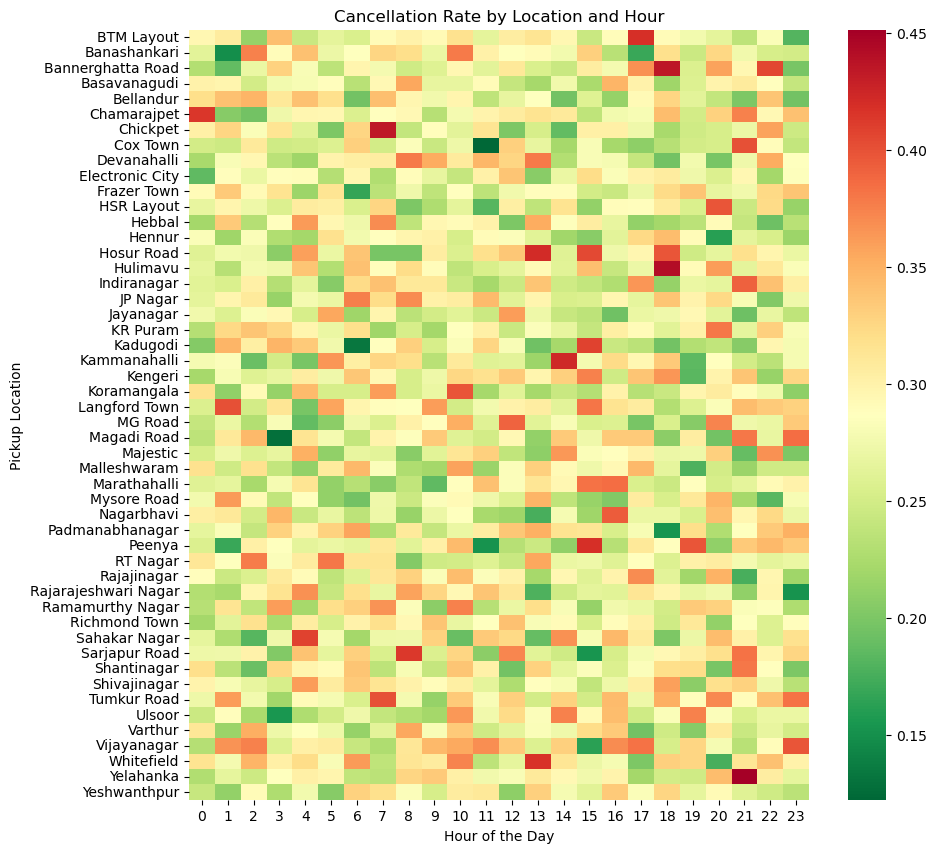

In [18]:
# creating a heatmap of the pivot table 
plt.figure(figsize = (10,10))
ax = sns.heatmap(data = pivot_table, cmap = 'RdYlGn_r', annot=False)
plt.title('Cancellation Rate by Location and Hour')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Pickup Location")
plt.show()

In the above heatmap, there is no specific "Bad Neighbourhood" or "Rush Hour" based on the cancellations. We can see isolated red squares (high cancellation ~45%) - like, Yelahanka at 9 PM (Hour 21) or Bannerghatta Road at 6 PM (Hour 18). However, these don't connect to a broader trend. These are anomalies rather than trends. If Location and Time were strong predictors, we would see clear, continuous "danger zones" for a specific location or time period.


Hence, based on the heatmap, it is confirmed that we cannot effectively predict cancellations using only Pickup Location and Time of Day.

### <i>Visualize the demand over the day. When are bookings highest? When are cancellations highest?</i>

In [19]:
# finding the successful bookings by hour 
successful_bookings_by_hour = df[df['Booking_Status'].str.contains('Success')].groupby('Hour')['Booking_Status'].count().sort_values(ascending=False)
successful_bookings_by_hour

Hour
15    2758
0     2726
11    2716
5     2710
12    2699
1     2697
17    2691
8     2681
9     2680
13    2680
21    2679
3     2668
14    2666
2     2658
23    2657
6     2655
4     2651
19    2646
16    2629
7     2628
10    2616
22    2609
20    2587
18    2580
Name: Booking_Status, dtype: int64

In [20]:
# finding the total count of cancelled rides by hour
cancelled_bookings_by_hour = df[df['Booking_Status'].str.contains('Canceled')].groupby('Hour')['Booking_Status'].count().sort_values(ascending=False)
cancelled_bookings_by_hour

Hour
10    1298
12    1258
8     1248
7     1244
21    1241
17    1240
22    1237
4     1230
20    1216
16    1212
15    1206
2     1202
6     1199
9     1198
13    1196
1     1190
14    1183
18    1179
11    1174
5     1171
19    1164
0     1158
23    1145
3     1144
Name: Booking_Status, dtype: int64

In [21]:
# for better analysis, calculating the cancellation rates by hour
cancellation_rates_by_hour = df.groupby('Hour')['Is_Cancelled'].mean() * 100
cancellation_rates_by_hour.sort_values(ascending = False)

Hour
10    29.949239
7     28.903346
22    28.881625
4     28.852920
20    28.760643
21    28.574718
12    28.539020
8     28.532236
17    28.486102
16    28.444027
18    28.232759
6     28.073051
14    27.953686
2     27.921022
13    27.911319
15    27.559415
9     27.559236
1     27.489027
11    27.481273
5     27.462477
19    27.253571
3     27.231612
23    27.094179
0     26.817971
Name: Is_Cancelled, dtype: float64

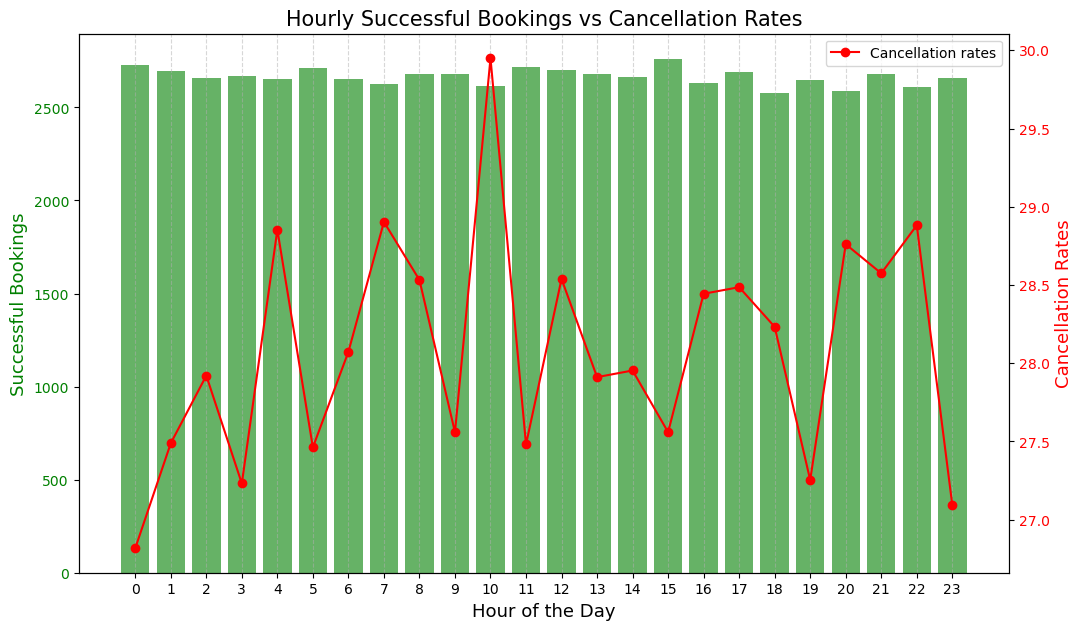

In [22]:
# creating a Combo Chart
fig, ax1 = plt.subplots(figsize = (12,7))

# plotting bars (successful bookings) on the primary (left) axis
bar_color = 'green'
ax1.bar(successful_bookings_by_hour.index, successful_bookings_by_hour, color = bar_color, alpha = 0.6, label = 'Successful Bookings')
ax1.set_xlabel('Hour of the Day', fontsize = 13)
ax1.set_ylabel('Successful Bookings', color = bar_color, fontsize = 13)
ax1.tick_params(axis = 'y', labelcolor = bar_color)

# creating a secondary axis for the line (cancellation rates)
ax2 = ax1.twinx()  # initiates a second axis that shares the same x-axis

# plotting a line (cancellation rates) on the secondary (right) axis
line_color = 'red'
ax2.plot(cancellation_rates_by_hour.index, cancellation_rates_by_hour, color = line_color, marker = 'o', linewidth = 1.5, label = 'Cancellation rates')
ax2.set_ylabel("Cancellation Rates", color = line_color, fontsize = 13)
ax2.tick_params(axis = 'y', labelcolor = line_color)

# adding grid and title
plt.title("Hourly Successful Bookings vs Cancellation Rates", fontsize = 15)
ax1.grid(axis = 'x', linestyle = '--', alpha = 0.5)
ax1.set_xticks(range(0, 24))
plt.legend()

plt.show()

The above visualization confirms that, 3 pm of the day has recorded the highest number of successful bookings (2758 bookings), while the cancellations were highest during  10 am of the day (~30 % cancellation rate).

##### NOTE: By analyzing the entire data, it is found that when a ride is canceled for whatever reason in the booking stage itself, then the further data pertaining to that specific booking attempt has not recorded recorded such as Ride distance, Customer and Driver Ratings and V_TAT, C_TAT. Since the ride has been cancelled, it is possible that the ride sharing platform, Uber, did not proceed to record all of these columns.

### <i>What is the most common reason for drivers to cancel a ride?</i>

In [23]:
reason = df['Canceled_Rides_by_Driver'].value_counts()

print("Most common reason for drivers to cancel a ride:")
print(f"\n{reason.idxmax()} ({reason.max()} cancellations)")

Most common reason for drivers to cancel a ride:

Personal & Car related issue (6542 cancellations)


### <b> Analyzing Driver Behaviour <b>
### <i> Do drivers significantly cancel "Low Value" rides more often than high-value ones? </i>

In [24]:
df['Booking_Status'].unique()

array(['Canceled by Driver', 'Success', 'Canceled by Customer',
       'Driver Not Found'], dtype=object)

In [25]:
df_successful_rides = df[df['Booking_Status'] == 'Success'].copy()
df_cancelled_rides = df[df['Booking_Status'].str.contains('Canceled by Driver')].copy()

<b>Hypothesis Testing  (Mann-Whitney U Test)</b>

##### <b>Hypothesis:</b>

Null Hypothesis (H0):
There is no significant difference in the Booking_Value between rides cancelled by drivers and successful rides. (i.e., Drivers cancel rides randomly, regardless of the fare).
    Median(cancelled rides) = Median(successfull rides)

Alternative Hypothesis (H1):
The Booking_Value of rides cancelled by drivers is significantly lower than that of successful rides. (i.e., Drivers are selectively canceling cheaper rides).
    Median(cancelled rides) < Median(successfull rides)

In [26]:
from scipy.stats import mannwhitneyu

# seperating the data into two groups
successful_rides_values = df_successful_rides['Booking_Value']
cancelled_rides_values = df_cancelled_rides['Booking_Value']

# performing the Mann-Whitney U Test
# alternative='less' because the hypothesis is that driver_canceled_values are lower than completed_values.
statistic, p_value = mannwhitneyu(cancelled_rides_values, successful_rides_values, alternative = 'less')

# interpretating the results 
print(f"\nMann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.5
if p_value < alpha:
    print("\nConclusion: Reject the Null Hypothesis.")
    print("There is significant evidence that drivers cancel 'Low Value' rides more often than high-value ones.")
else:
    print("\nConclusion: Failed to reject the Null Hypothesis.")
    print("There is no significant evidence that dirvers disproportionately cancel low -value rides.")



Mann-Whitney U Statistic: 592045683.0
P-value: 0.8065237625341422

Conclusion: Failed to reject the Null Hypothesis.
There is no significant evidence that dirvers disproportionately cancel low -value rides.


Analyzing with the help of boxplot

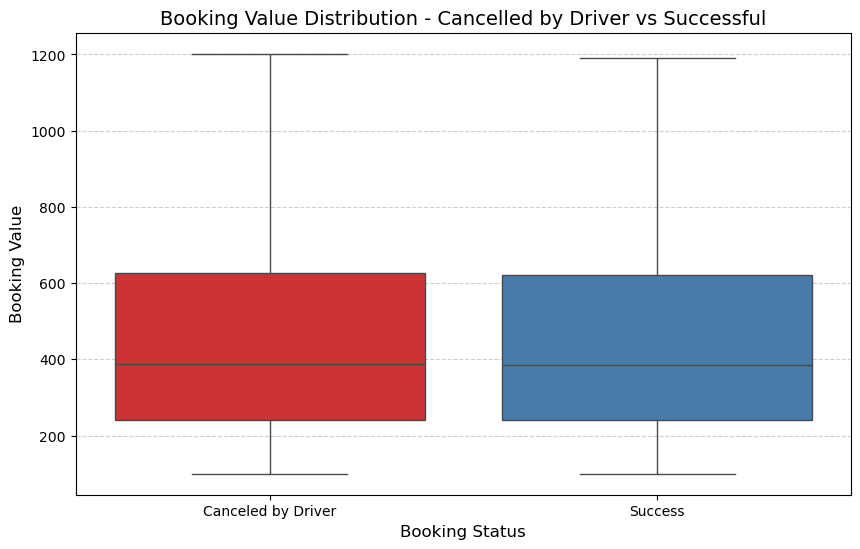

In [27]:
df_1 = df[df['Booking_Status'].isin(['Canceled by Driver', 'Success'])].copy()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Booking_Status', y='Booking_Value', data=df_1, palette='Set1', showfliers = False)

plt.title("Booking Value Distribution - Cancelled by Driver vs Successful", fontsize = 14)
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Booking Value', fontsize=12)
plt.grid(axis = 'y', linestyle = '--', alpha=0.6)
plt.show()

### <b>Geospatial & Loss Analysis</b>
### <i>Which specific Pickup-Dropoff routes result in the highest Opportunity Loss (Revenue Lost due to Cancellations/Incomplete rides)?</i>

In [28]:
# filtering out rows where ride was not 'Successful'
unsuccessful_rides = df[df['Booking_Status'] != 'Success'].copy()

# creating 'Route' column by combining Pickup and Drop Location columns (for the sake of grouping routes taken)
unsuccessful_rides['Route'] = unsuccessful_rides['Pickup_Location'] + " -> " + unsuccessful_rides['Drop_Location']

# grouping the data by Route column and calculating the sum by routes
route_loss = unsuccessful_rides.groupby('Route')['Booking_Value'].sum().reset_index()

#sorting the data to find the top 10 locations with highest loss route-wise
route_loss_sorted = route_loss.sort_values(by='Booking_Value', ascending=False).head(10)

print("Top 10 Routes with the Highest Opportunity Loss:")
print("\n",route_loss_sorted)

Top 10 Routes with the Highest Opportunity Loss:

                                      Route  Booking_Value
481          Electronic City -> Nagarbhavi          22543
1124              Kengeri -> Langford Town          21758
946               Jayanagar -> Vijayanagar          21159
86    Banashankari -> Rajarajeshwari Nagar          19708
464          Electronic City -> Hosur Road          19575
331                 Chickpet -> Nagarbhavi          19043
383                     Cox Town -> Peenya          18662
1074         Kammanahalli -> Langford Town          18656
1599            Nagarbhavi -> Yeshwanthpur          18151
749             Hosur Road -> Yeshwanthpur          18139


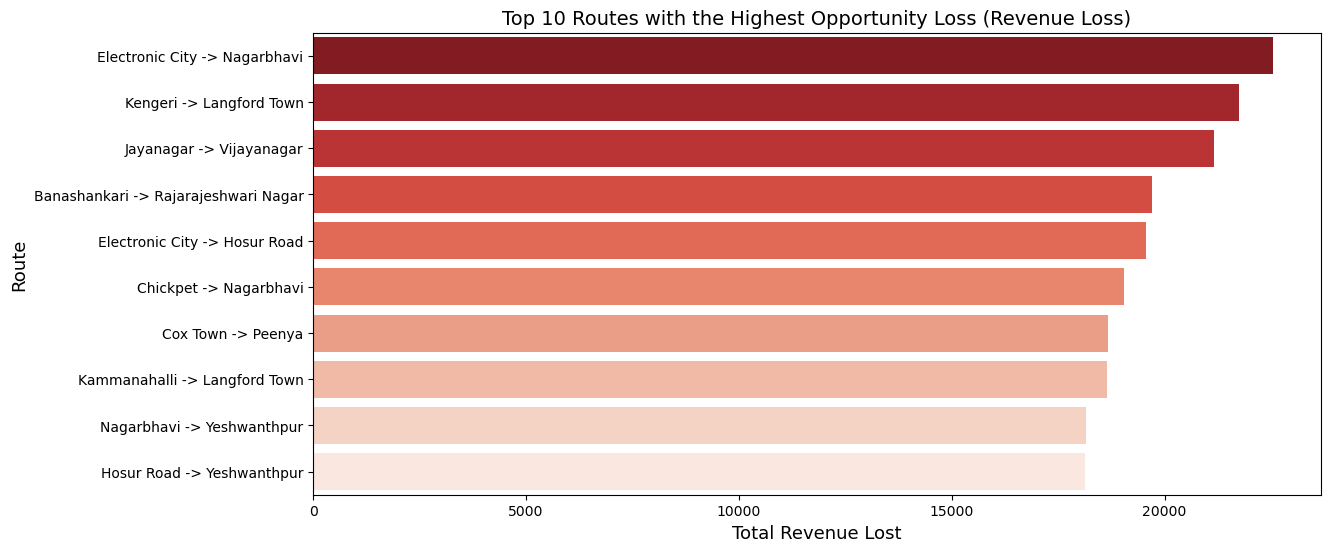

In [29]:
# visualizing the result
plt.figure(figsize=(13,6))
sns.barplot(data=route_loss_sorted, x='Booking_Value', y='Route', palette= 'Reds_r')
plt.xlabel('Total Revenue Lost', fontsize = 13)
plt.ylabel('Route', fontsize = 13)
plt.title('Top 10 Routes with the Highest Opportunity Loss (Revenue Loss)', fontsize = 14)
plt.show()

### <i>Is there a correlation between Driver_Ratings and Customer_Rating for the same trip?</i>

To check whether a Driver rates the Customer low in retaliation, when a Customer rates a Driver low, I will check the correlation between these two features for each trip.  

In [30]:
# since the ratings exist for only Successful rides, we will use the dataframe created earlier for the successful rides
# df_successful_rides.head(10)

# calculating the correaltion
correlation = df_successful_rides['Customer_Rating'].corr(df_successful_rides['Driver_Ratings'])

print(f"The Correlation between Customer and Driver Ratings: {correlation:.2f}")

The Correlation between Customer and Driver Ratings: -0.00


A correlation of -0.03 is effectively zero. This means there is no relationship between how a driver rates a customer and how a customer rates a driver

### <i>How does the vehicle wait time (V_TAT) impact the Driver's Rating, and at what specific duration does customer satisfaction drop the most?</i>

In [31]:
# using the data filtered for successful rides
# df_successful_rides.head()

# ensuring V_TAT and Ratings are numeric (handling potential errors)
df_successful_rides['V_TAT'] = pd.to_numeric(df_successful_rides['V_TAT'], errors='coerce')
df_successful_rides['Driver_Ratings'] = pd.to_numeric(df_successful_rides['Driver_Ratings'], errors='coerce')

# dropping rows where the specific values are missing
df_successful_rides.dropna(subset=['V_TAT', 'Driver_Ratings'], inplace=True)

# rounding V_TAT to the nearest integer (seconds)
df_successful_rides['V_TAT'] = df_successful_rides['V_TAT'].round()

# aggregation: grouping by V_TAT and calculating mean and count of rides
rating_curve = df_successful_rides.groupby('V_TAT')['Driver_Ratings'].agg(['mean', 'count'])

# we want to analyze wait times that happen frequently (at least 50 rides)
rating_curve_cleaned = rating_curve[rating_curve['count'] > 50]
rating_curve_cleaned.head()

,mean,count
V_TAT,,
35.0,3.984091,1584
42.0,3.984184,1606
49.0,3.983376,1564
56.0,3.993772,1670
63.0,4.015389,1631


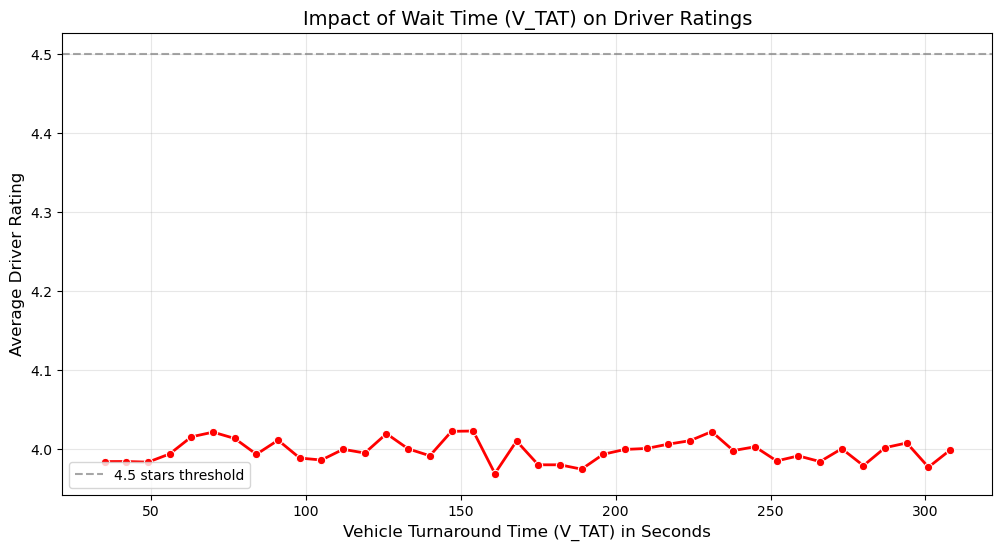

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_curve_cleaned, x=rating_curve_cleaned.index, y='mean', marker='o', linewidth=2, color='red')
plt.axhline(y=4.5, color='grey', linestyle='--', alpha=0.7, label='4.5 stars threshold')
plt.title('Impact of Wait Time (V_TAT) on Driver Ratings', fontsize=14)
plt.xlabel('Vehicle Turnaround Time (V_TAT) in Seconds', fontsize=12)
plt.ylabel('Average Driver Rating', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [33]:
# finding the steepest drop in Driver Rating as Wait time increases
# calculating the difference in rating from the previous wait time
rating_curve_cleaned['Drop_from_Prev_Sec'] = rating_curve_cleaned['mean'].diff()

#finding the second with the biggest negative drop in mean rating
max_drop_time = rating_curve_cleaned['Drop_from_Prev_Sec'].idxmin()

print("--- ANALYSIS RESULTS ---")
print(f"The sharpest drop in satisfaction (Driver Rating) occurs at : {max_drop_time}")
print(f"Ratings drop by {abs(rating_curve_cleaned.loc[max_drop_time, 'Drop_from_Prev_Sec']):.3f} points at this mark.")
print("\nData Preview:")
print(rating_curve_cleaned[['mean', 'count']].head(20))

--- ANALYSIS RESULTS ---
The sharpest drop in satisfaction (Driver Rating) occurs at : 161.0
Ratings drop by 0.054 points at this mark.

Data Preview:
           mean  count
V_TAT                 
35.0   3.984091   1584
42.0   3.984184   1606
49.0   3.983376   1564
56.0   3.993772   1670
63.0   4.015389   1631
70.0   4.021314   1614
77.0   4.013309   1623
84.0   3.993305   1628
91.0   4.011145   1624
98.0   3.988542   1632
105.0  3.986077   1652
112.0  3.999626   1603
119.0  3.994904   1609
126.0  4.019404   1644
133.0  4.000186   1610
140.0  3.991470   1524
147.0  4.022334   1585
154.0  4.022736   1601
161.0  3.968995   1532
168.0  4.010061   1650


In [34]:
df.to_csv('rides.csv', index=False )